This file downloads youtube videos into images

In [24]:
!pip install youtube-dl

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.9/1.9 MB 9.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


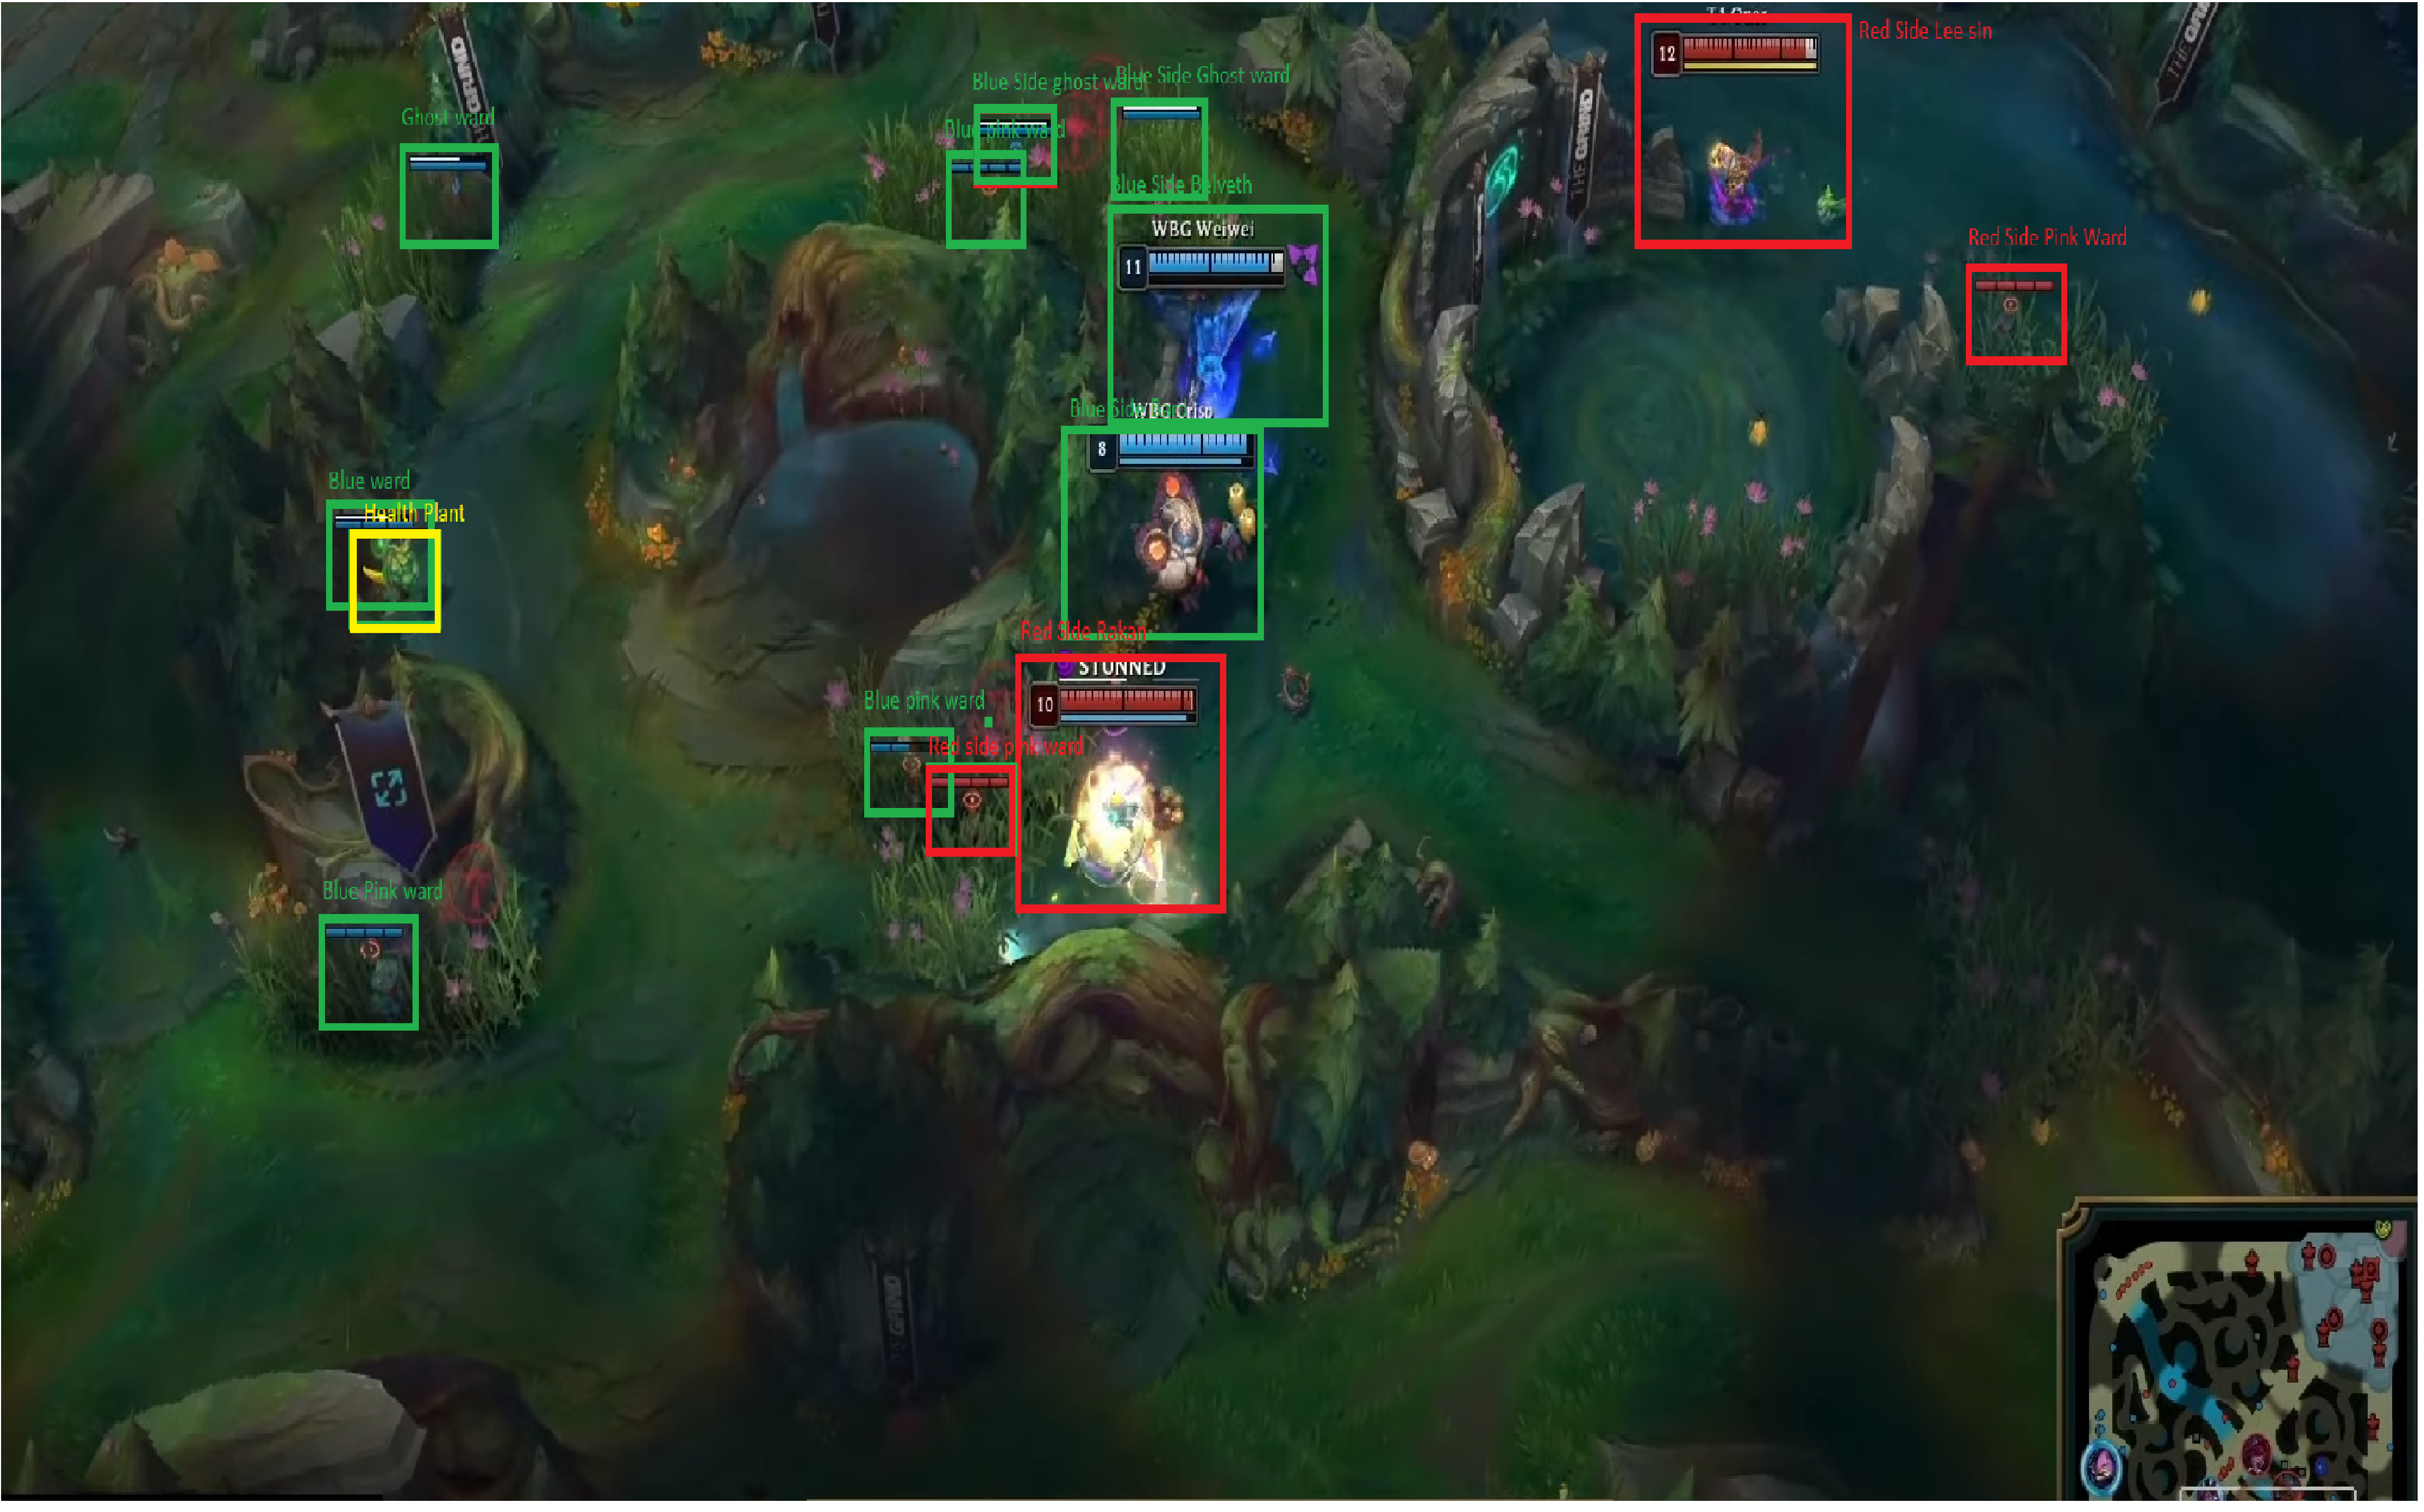

In [2]:
from IPython.display import Image
Image(filename="concept.png")

In [30]:
!pip install yt_dlp

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for yt_dlp from https://files.pythonhosted.org/packages/31/5a/d9b0a47a3aacf650b8ffc750bb5d296c24b2cc674f4c2a975895f49d4f0a/yt_dlp-2023.11.16-py2.py3-none-any.whl.metadata
     -------------------------------------- 160.5/160.5 kB 4.8 MB/s eta 0:00:00
  Obtaining dependency information for mutagen from https://files.pythonhosted.org/packages/b0/7a/620f945b96be1f6ee357d211d5bf74ab1b7fe72a9f1525aafbfe3aee6875/mutagen-1.47.0-py3-none-any.whl.metadata
  Obtaining dependency information for pycryptodomex from https://files.pythonhosted.org/packages/3c/a4/81675804055339db8e277f48bf0012b554a2322f15d000caebf7c8d3f011/pycryptodomex-3.19.0-cp35-abi3-win_amd64.whl.metadata
  Obtaining dependency information for websockets from https://files.pythonhosted.org/packages/94/92/5dc1202332df60422869fdb6c86213ff6987b1b06c329eed329cc49966f7/websockets-12.0-cp39-cp39-win_amd64.whl.metadata
  Obta

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-auth 2.23.0 requires urllib3<2.0, but you have urllib3 2.1.0 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from yt_dlp import YoutubeDL
import os
import subprocess
import string
import time
import random
import uuid


In [32]:
# URLS = ['https://www.youtube.com/watch?v=zpn-JXhvCaE']
# with YoutubeDL() as ydl:
#     ydl.download(URLS)

[youtube] Extracting URL: https://www.youtube.com/watch?v=zpn-JXhvCaE
[youtube] zpn-JXhvCaE: Downloading webpage
[youtube] zpn-JXhvCaE: Downloading ios player API JSON
[youtube] zpn-JXhvCaE: Downloading android player API JSON
[youtube] zpn-JXhvCaE: Downloading player 190c935f
[youtube] zpn-JXhvCaE: Downloading m3u8 information
[info] zpn-JXhvCaE: Downloading 1 format(s): 303+251
[download] Destination: All Annie Skins Spotlight 2021 (League of Legends) [zpn-JXhvCaE].f303.webm
[download] 100% of  138.79MiB in 00:00:14 at 9.61MiB/s     
[download] Destination: All Annie Skins Spotlight 2021 (League of Legends) [zpn-JXhvCaE].f251.webm
[download] 100% of   15.82MiB in 00:00:01 at 8.95MiB/s     
[Merger] Merging formats into "All Annie Skins Spotlight 2021 (League of Legends) [zpn-JXhvCaE].webm"
Deleting original file All Annie Skins Spotlight 2021 (League of Legends) [zpn-JXhvCaE].f303.webm (pass -k to keep)
Deleting original file All Annie Skins Spotlight 2021 (League of Legends) [zpn-JX

In [8]:
def sanitize_filename(filename):
    valid_chars = "-_.() %s%s" % (string.ascii_letters, string.digits)
    return ''.join(c for c in filename if c in valid_chars)
def extract_class_name(title):
    # Assuming the class name is the second word in the title
    parts = title.split(' ')
    if len(parts) > 1:
        return parts[1]  # The class name is the second word
    return 'Unknown'  # Default class name if not found

In [13]:
URLS = ['https://www.youtube.com/watch?v=zpn-JXhvCaE', 'https://www.youtube.com/watch?v=ztkBLYqoV8w']
video_info = {}

with YoutubeDL({'outtmpl': '%(title)s.%(ext)s', 'quiet': True}) as ydl:
    for url in URLS:
        info = ydl.extract_info(url, download=True)
        original_title = info['title']
        sanitized_title = sanitize_filename(original_title)
        ext = info['ext']  # Extract the extension from the info

        original_file_name = f"{original_title}.{ext}"
        sanitized_file_name = f"{sanitized_title}.{ext}"

        # Check if the original file exists and then rename it
        if os.path.exists(original_file_name):
            os.rename(original_file_name, sanitized_file_name)

        video_info[url] = sanitized_title

In [11]:
video_info

{'https://www.youtube.com/watch?v=zpn-JXhvCaE': 'All Annie Skins Spotlight 2021 (League of Legends)',
 'https://www.youtube.com/watch?v=ztkBLYqoV8w': 'ALL AKSHAN SKINS  League of Legends'}

In [14]:
for url, title in video_info.items():
    unique_identifier = str(uuid.uuid4())
    video_file = f"{title}.webm"
    output_folder = f"{title}_frames"
    os.makedirs(output_folder, exist_ok=True)

    video_file_path = os.path.join(os.getcwd(), video_file)
    output_folder_path = os.path.join(os.getcwd(), output_folder)
    class_name = extract_class_name(title)
    command = f"ffmpeg -i \"{video_file_path}\" -vf fps=1/2 \"{output_folder_path}/{class_name}_{unique_identifier}-%03d.jpg\""
    print(command)
    result = subprocess.run(command, shell=True, capture_output=True, text=True)

    if result.returncode != 0:
        print(f"Error with ffmpeg for {video_file}:")
        print(result.stderr)
    else:
        print(f"Frames extracted for {video_file} into {output_folder}")

ffmpeg -i "c:\Users\Grego\Desktop\lol_image_recognition\All Annie Skins Spotlight 2021 (League of Legends).webm" -vf fps=1/2 "c:\Users\Grego\Desktop\lol_image_recognition\All Annie Skins Spotlight 2021 (League of Legends)_frames/Annie_ac002fc6-4cdb-48c3-9261-61467fe36cfb-%03d.jpg"
Frames extracted for All Annie Skins Spotlight 2021 (League of Legends).webm into All Annie Skins Spotlight 2021 (League of Legends)_frames
ffmpeg -i "c:\Users\Grego\Desktop\lol_image_recognition\ALL AKSHAN SKINS  League of Legends.webm" -vf fps=1/2 "c:\Users\Grego\Desktop\lol_image_recognition\ALL AKSHAN SKINS  League of Legends_frames/AKSHAN_51b9c519-1cb0-419f-baa0-149669a0c312-%03d.jpg"
Frames extracted for ALL AKSHAN SKINS  League of Legends.webm into ALL AKSHAN SKINS  League of Legends_frames
